In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Geodesics as gd
import Model as md
import cmath as cmt
import glob
import os

In [3]:
##Set simulation parameters

p = 5; q = 4; nlayers = 6 #Lattice parameters
nDecorr = 20 #Steps to decorrelate
nMeasurements = 50000 #Number of measurements
saveFreq = 10000 #Save frequency
#Set up model
model = md.FractonModel(p,q,nlayers)
nBorder = len(model.border)

# Define the directory where you want to save the files
save_dir = "../Data/P"+str(p)+"Q"+str(q)+"/"+str(nlayers)+"Layers"

# Check if the directory exists, if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [ ]:
#Set up model
model = md.FractonModel(p,q,nlayers)

#Number of spins in the border
nBorder = len(model.border)

#Initialize correlation and states arrays
corr = np.zeros(int(len(model.border)/2))
#Initialize save counter
saveCounter = 0

#Simulation main loop
for iteration in range(nMeasurements):
    model.decorrelate(nDecorr)
    corr += model.getBorderCorrelations()/(nBorder)
    saveCounter += 1
    if(saveCounter == saveFreq):
        np.save(os.path.join(save_dir, "Correlation" + str(int(iteration/saveFreq)) + ".npy"),np.array(corr))
        saveCounter = 0

In [ ]:
model.quick_plot(colors = 'spins')
eArray = model.spins[model.border]*model.spins[model.border][np.array(model.borderNeigh)[:,0]]
print(np.sum(eArray[model.borderNeigh]*eArray[:,None],axis = 0))

In [46]:
corr_list = sorted(glob.glob("../Data/P5Q4/5Layers/Correlations?.npy"))
corr_list += sorted(glob.glob("../Data/P5Q4/5Layers/Correlations??.npy"))

states_list =sorted(glob.glob("../Data/P5Q4/5Layers/States?.npy"))
states_list +=sorted(glob.glob("../Data/P5Q4/5Layers/States??.npy"))

distances = np.linspace(1,int(nBorder/2),int(nBorder/2))

In [47]:
corrTest = np.zeros(280)
for idx,file in enumerate(states_list):
    print(idx)
    state_spins = np.load(file)
    for l in range(10000):
        model.spins = state_spins[l,:]
        corrTest += model.getBorderCorrelations() 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [53]:
corrTest = corrTest*(1000000*560)
np.save(os.path.join(save_dir, "CorrectCorrelation" + ".npy"),corrTest)

Text(0.5, 0, '$d$')

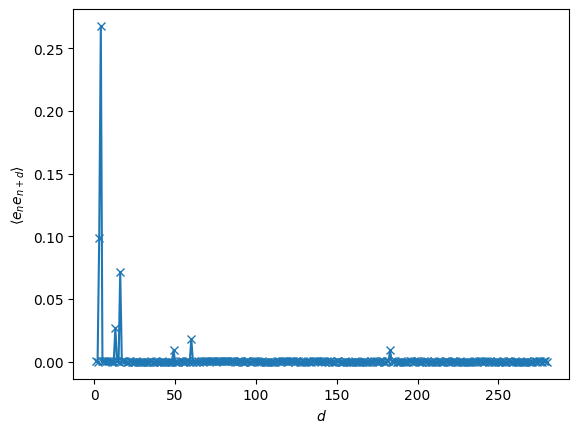

In [77]:
fig, ax = plt.subplots()
ax.plot(distances,corrTest,'x-')
ax.set_ylabel(r'$\left< e_ne_{n+d} \right>$')
ax.set_xlabel(r'$d$')


In [ ]:
def isBetween(z0,z1,z2):
    cross10 = z1.real*z0.imag-z0.real*z1.imag
    cross12 = z1.real*z2.imag-z2.real*z1.imag
    cross20 = z2.real*z0.imag-z0.real*z2.imag
    cross21 = -z1.real*z2.imag+z2.real*z1.imag
    isBe = (cross10*cross12) >= 0 and (cross20*cross21) >= 0
    return isBe

In [ ]:
borderCenters = model.centers[model.border]
centersAndNeighs = borderCenters[model.borderNeigh]
wedges = np.zeros(int(len(borderCenters)/2))
for idx1 in range(len(borderCenters)):
    center = borderCenters[idx1]
    neighs = centersAndNeighs[idx1,:]
    for idx2 in range(int(len(borderCenters)/2)):
        z1 = center
        z2 = neighs[idx2]
        for g in model.geodesicList:
            add = 1
            if isBetween(g.endpoints[0],z1,z2):
                add *= -1
            if isBetween(g.endpoints[0],z1,z2):
                add *= -1
            if add == -1:
                wedges[idx2] += 1



## Entanglement entropy

def isBetween(z0,z1,z2):
    cross10 = z1.real*z0.imag-z0.real*z1.imag
    cross12 = z1.real*z2.imag-z2.real*z1.imag
    cross20 = z2.real*z0.imag-z0.real*z2.imag
    cross21 = -z1.real*z2.imag+z2.real*z1.imag
    isBe = (cross10*cross12) >= 0 and (cross20*cross21) >= 0
    return isBe

borderCenters = model.centers[model.border]
centersAndNeighs = borderCenters[model.borderNeigh]
wedges = np.zeros(int(len(borderCenters)/2))
for idx1 in range(len(borderCenters)):
    center = borderCenters[idx1]
    neighs = centersAndNeighs[idx1]
    print(idx1)
    for idx2 in range(int(len(borderCenters)/2)):
        z1 = center
        z2 = neighs[idx2]
        for g in model.geodesicList:
            add = 1
            if isBetween(g.endpoints[0],z1,z2):
                add *= -1
            if isBetween(g.endpoints[1],z1,z2):
                add *= -1
            if add == -1:
                wedges[idx2] += 1